# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()

In [41]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [42]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df.loc[:, 'Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


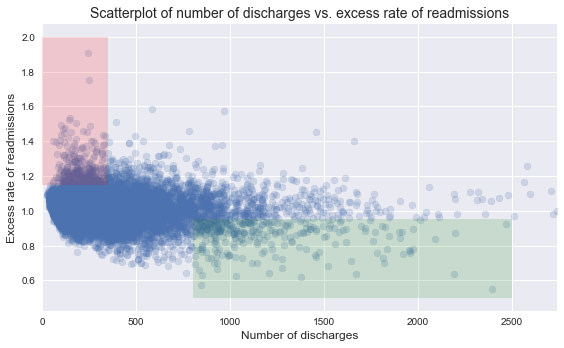

In [43]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not believe enough evidence has been presented to agree with the above preliminary analysis and recommendations. If a significant correlation existed I would agree with some of the recommendations made, but the lack of a test statistic or explanation as to how sample sizes were drawn results in a misleading assertion about the correlation between hospital capacity and excess readmission rates.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup an appropriate hypothesis test.

   Ho : There is not a statistically significant correlation between hospital capacity (number of discharges) and  readmission rates

   Ha : The correlation between hospital capacity (number of discharges) and readmission rates is significant

#### 2. Compute and report the observed significance level (or p-value).

In [44]:
#view dataframe and percentage of columns consisting of NaN
print(clean_hospital_read_df.info())
print(clean_hospital_read_df.isnull().mean())
print(clean_hospital_read_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB
None
Hospital Name                 0.000000
Provider Number               0.000000
State                         0.000000
Measure Name                  0.000000
Number of Discharges          

In [46]:
#remove null values from excess readmission ratio column from final hospitals df
hospitals_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [50]:
#define function to test for signficance of a correlation
def pearsonr_perm_test(x, y, size):
    pearson_r = np.corrcoef(x,y)[0,1]
    perm_replicates = np.empty(size)
    for i in range(size):
        x_perm = np.random.permutation(x)
        perm_replicates[i] = np.corrcoef(x_perm, y)[0,1]
    p = np.sum(perm_replicates <= pearson_r) / len(perm_replicates)
    return pearson_r, p 

#define values for test of correlation
discharges = hospitals_df['Number of Discharges']
rate = hospitals_df['Excess Readmission Ratio']

#show correlation coefficient and p-value
print('Pearson Correlation Coefficient: r = %6.3f, P-value = %6.8f' % pearsonr_perm_test(discharges, rate, 10000))

Pearson Correlation Coefficient: r = -0.097, P-value = 0.00000000


#### 3. Report statistical significance for $\alpha$ = .01.

With an alpha level of .01, the correlation between hospital capacity (number of discharges) and readmission rate was statistically significant, p < .01

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers to the unlikelihood that test statistic differences observed in the sample have occurred due to sampling error. As a result, if a large enough sample is given, despite seemingly insignificant population differences, one might still find statistical significance. Whereas practical significance refers to whether or not the difference is large enough to be of value in a tangible sense. In this case even though the correlation between hospital capacity and excess readmission rate is significant, it is difficult to discern how that might assist the decision making process for the disbursement of payments to hospitals without more context. I would recommend the client to look further into environmental factors that could result in smaller hospitals having a higher rate of excess readmissions, such as ease of access to preventative and follow-up care, as well as the need for updating potentially outdated facilites.

#### 5. Look at the scatterplot above.
+ What are the advantages and disadvantages of using this plot to convey information?
+ Construct another plot that conveys the same information in a more direct manner.

The advantage of the plot being utilized is that it has a good ability to convey information about the spread of the data, providing shaded areas distinguishing the sample portion from the overall data. The glaring disadvantage of using this plot is its vague representation of the correlation between the excess rate of readmissions and number of discharges, displaying the data without a correlation coefficient or a visual aide such as a regression line.

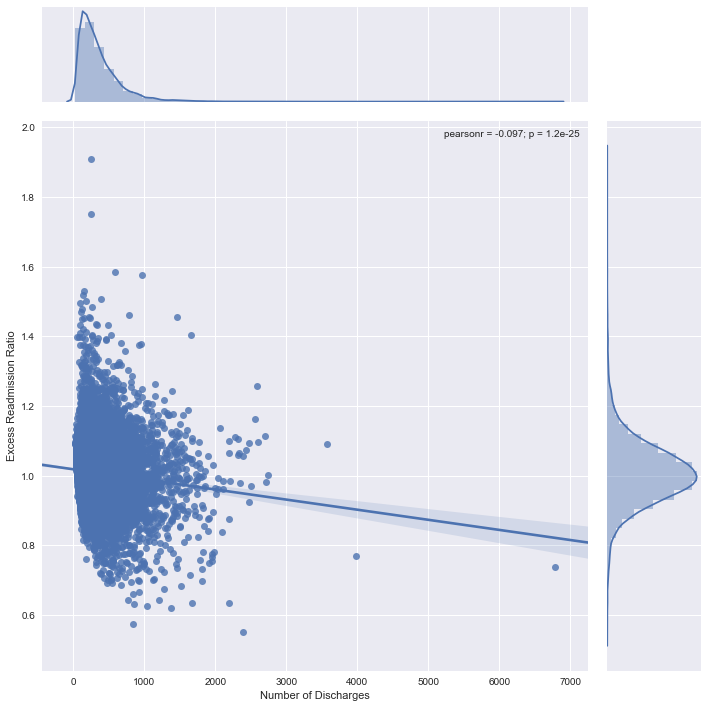

In [60]:
#create jointplot to display data, pearsonr, regression line, and distribution of both variables
sns.jointplot(discharges, rate, kind="reg", size=10)